In [63]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Fraudulent_E-Commerce_Transaction_Data_2.csv')

# Display the first few rows of the dataset to verify loading
print(df.head())



                         Transaction ID                           Customer ID  \
0  c12e07a0-8a06-4c0d-b5cc-04f3af688570  8ca9f102-02a4-4207-ab63-484e83a1bdf0   
1  7d187603-7961-4fce-9827-9698e2b6a201  4d158416-caae-4b09-bd5b-15235deb9129   
2  f2c14f9d-92df-4aaf-8931-ceaf4e63ed72  ccae47b8-75c7-4f5a-aa9e-957deced2137   
3  e9949bfa-194d-486b-84da-9565fca9e5ce  b04960c0-aeee-4907-b1cd-4819016adcef   
4  7362837c-7538-434e-8731-0df713f5f26d  de9d6351-b3a7-4bc7-9a55-8f013eb66928   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               42.32  2024-03-24 23:42:43         PayPal      electronics   
1              301.34  2024-01-22 00:53:31    credit card      electronics   
2              340.32  2024-01-22 08:06:03     debit card     toys & games   
3               95.77  2024-01-16 20:34:53    credit card      electronics   
4               77.45  2024-01-16 15:47:23    credit card         clothing   

   Quantity  Customer Age    Customer Locati

In [83]:
# Get a summary of the DataFrame
print("\nInfo about the dataset:")
print(df.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 no

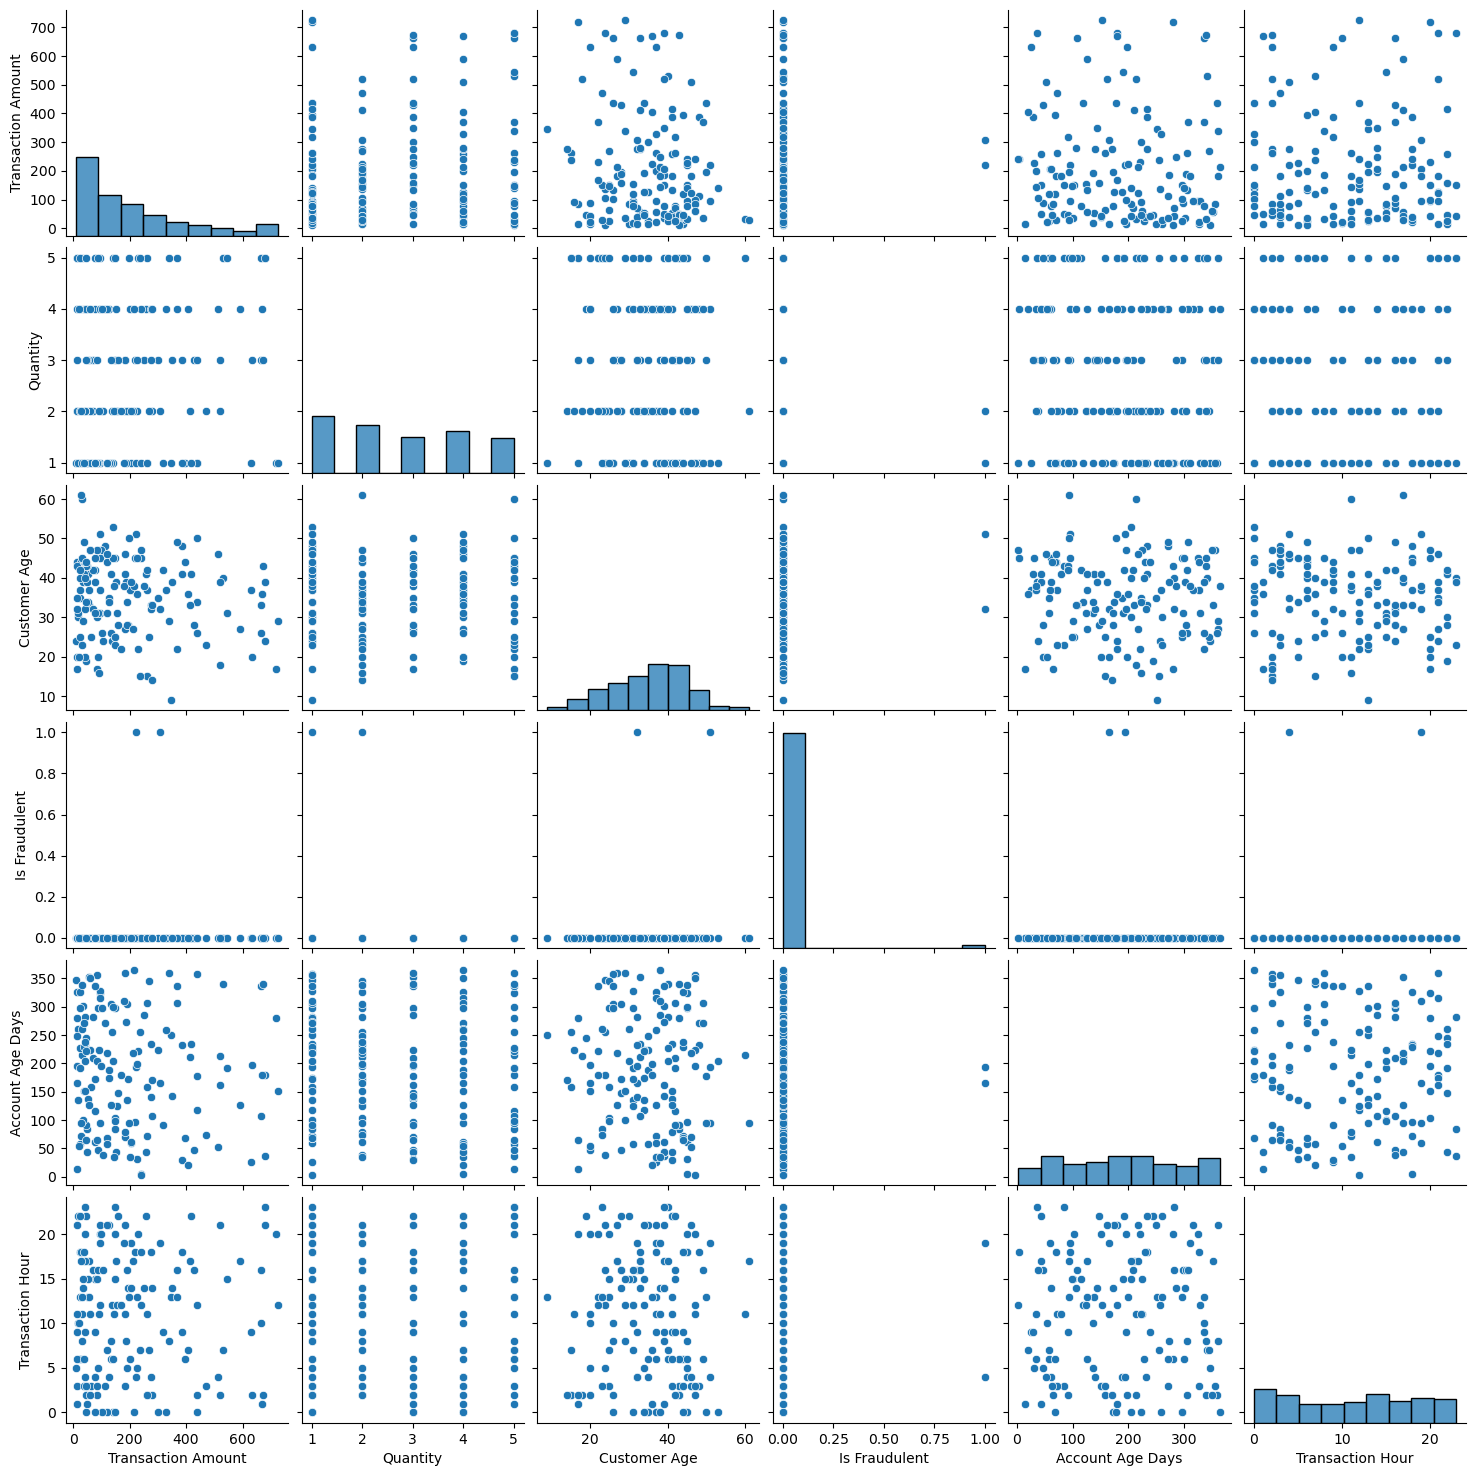

In [65]:
# Visualize the first 100 rows of the dataset
sns.pairplot(df.head(150))
plt.show()

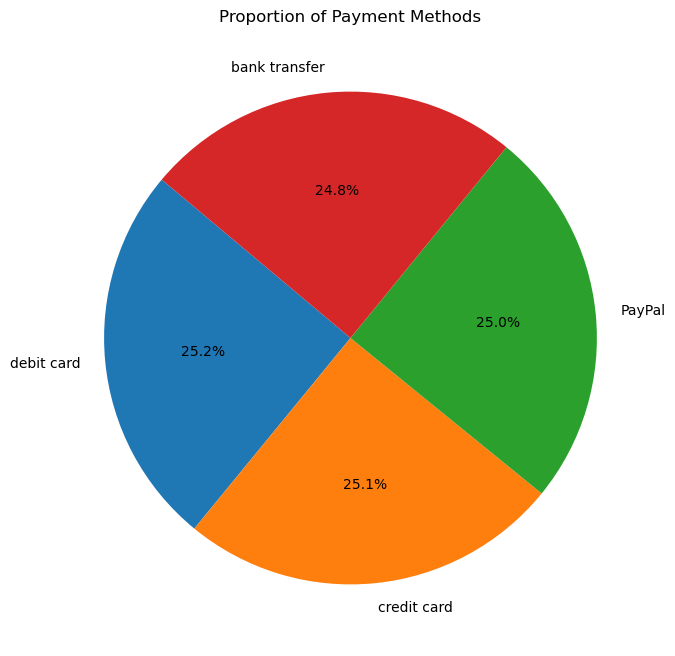

In [67]:
# Pie chart for Payment Methods
plt.figure(figsize=(8, 8))
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Payment Methods')
plt.ylabel('')
plt.show()

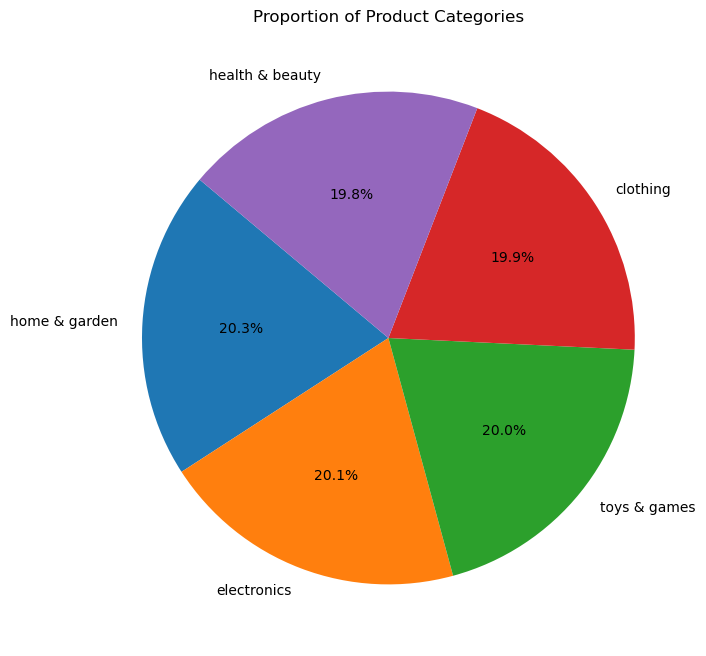

In [69]:
# Pie chart for Product Categories
plt.figure(figsize=(8, 8))
df['Product Category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Product Categories')
plt.ylabel('')
plt.show()

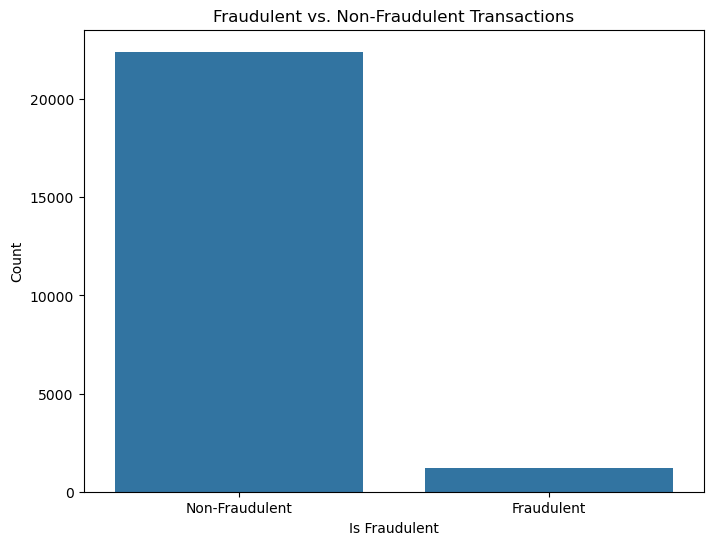

In [71]:
# Bar chart for Fraudulent vs. Non-Fraudulent Transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Is Fraudulent')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

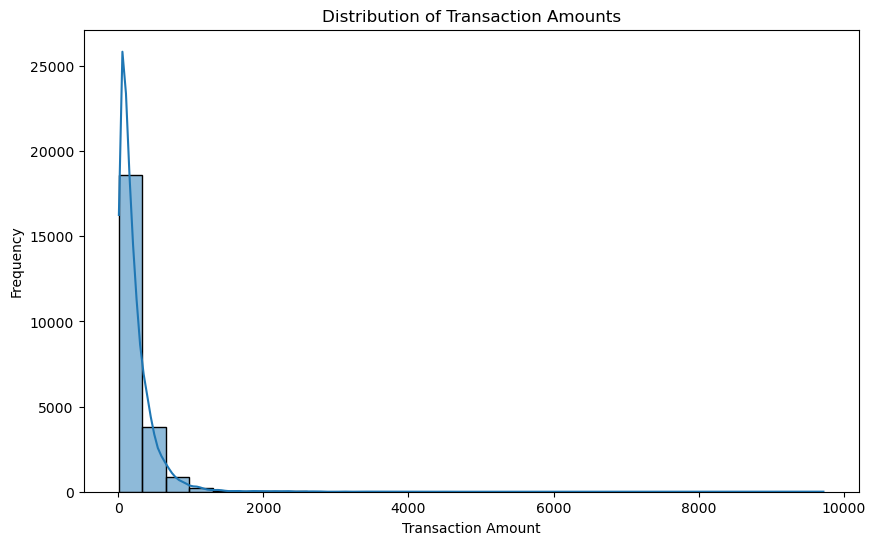

In [73]:
# Histogram for Transaction Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [85]:
# Get a statistical summary of the DataFrame
print("\nStatistical summary of the dataset:")
print(df.describe())


Statistical summary of the dataset:
       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        23634.000000  23634.000000  23634.000000   23634.000000   
mean           229.367099      3.000550     34.560210       0.051705   
std            282.046669      1.419663     10.009471       0.221436   
min             10.000000      1.000000     -2.000000       0.000000   
25%             69.070000      2.000000     28.000000       0.000000   
50%            151.415000      3.000000     35.000000       0.000000   
75%            296.127500      4.000000     41.000000       0.000000   
max           9716.500000      5.000000     73.000000       1.000000   

       Account Age Days  Transaction Hour  
count      23634.000000      23634.000000  
mean         178.660531         11.266015  
std          107.388682          6.980659  
min            1.000000          0.000000  
25%           84.000000          5.000000  
50%          178.000000         11.000000  
75%   

In [87]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


In [89]:
# Create new features from 'Transaction Date' 
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Transaction Year'] = df['Transaction Date'].dt.year
df['Transaction Month'] = df['Transaction Date'].dt.month
df['Transaction Day'] = df['Transaction Date'].dt.day
df['Transaction Hour'] = df['Transaction Date'].dt.hour  # Redundant if already present
df['Transaction Minute'] = df['Transaction Date'].dt.minute
df['Transaction Second'] = df['Transaction Date'].dt.second

# Drop the original 'Transaction Date' as we have extracted its components
df = df.drop(['Transaction Date'], axis=1)

# Example: Drop 'Transaction ID' and 'Customer ID' if they are not relevant for your analysis
df = df.drop(['Transaction ID', 'Customer ID'], axis=1)

# Display the first few rows of the modified dataset
print("First few rows of the modified dataset:")
print(df.head())

# Display the columns of the modified dataset
print("\nColumns of the modified dataset:")
print(df.columns)

First few rows of the modified dataset:
   Transaction Amount Payment Method Product Category  Quantity  Customer Age  \
0               42.32         PayPal      electronics         1            40   
1              301.34    credit card      electronics         3            35   
2              340.32     debit card     toys & games         5            29   
3               95.77    credit card      electronics         5            45   
4               77.45    credit card         clothing         5            42   

     Customer Location Device Used       IP Address  \
0      East Jameshaven     desktop    110.87.246.85   
1             Kingstad      tablet    14.73.104.153   
2           North Ryan     desktop      67.58.94.93   
3           Kaylaville      mobile  202.122.126.216   
4  North Edwardborough     desktop     96.77.232.76   

                                    Shipping Address  \
0  5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1        5230 Stephanie Forge\

In [91]:
# Check which feature is categorical feature
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Payment Method',
 'Product Category',
 'Customer Location',
 'Device Used',
 'IP Address',
 'Shipping Address',
 'Billing Address']

In [93]:
# Apply mappings
df['Payment Method'] = df['Payment Method'].map({"debit card": 0, "credit card": 1, "PayPal": 2, "bank transfer": 3})
df['Product Category'] = df['Product Category'].map({"home & garden": 0, "electronics": 1, "toys & games": 2, "clothing": 3, "health & beauty": 4})
df['Device Used'] = df['Device Used'].map({"desktop": 0, "mobile": 1, "tablet": 2})

print(df.head())

   Transaction Amount  Payment Method  Product Category  Quantity  \
0               42.32               2                 1         1   
1              301.34               1                 1         3   
2              340.32               0                 2         5   
3               95.77               1                 1         5   
4               77.45               1                 3         5   

   Customer Age    Customer Location  Device Used       IP Address  \
0            40      East Jameshaven            0    110.87.246.85   
1            35             Kingstad            2    14.73.104.153   
2            29           North Ryan            0      67.58.94.93   
3            45           Kaylaville            1  202.122.126.216   
4            42  North Edwardborough            0     96.77.232.76   

                                    Shipping Address  \
0  5399 Rachel Stravenue Suite 718\nNorth Blakebu...   
1        5230 Stephanie Forge\nCollinsbury, PR 81853

In [95]:
# Check if there are "Nan" values in the dataset
print(df['Payment Method'].unique())
print(df['Product Category'].unique())
print(df['Device Used'].unique())

[2 1 0 3]
[1 2 3 0 4]
[0 2 1]


In [97]:
# Check Non-numeric columns.
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Customer Location', 'IP Address', 'Shipping Address',
       'Billing Address'],
      dtype='object')


In [101]:
from sklearn.preprocessing import LabelEncoder

for column in non_numeric_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])

In [103]:
print(df.dtypes)


Transaction Amount    float64
Payment Method          int64
Product Category        int64
Quantity                int64
Customer Age            int64
Customer Location       int64
Device Used             int64
IP Address              int64
Shipping Address        int64
Billing Address         int64
Is Fraudulent           int64
Account Age Days        int64
Transaction Hour        int32
Transaction Year        int32
Transaction Month       int32
Transaction Day         int32
Transaction Minute      int32
Transaction Second      int32
dtype: object


In [105]:
print(df.head())

   Transaction Amount  Payment Method  Product Category  Quantity  \
0               42.32               2                 1         1   
1              301.34               1                 1         3   
2              340.32               0                 2         5   
3               95.77               1                 1         5   
4               77.45               1                 3         5   

   Customer Age  Customer Location  Device Used  IP Address  Shipping Address  \
0            40               2447            0        1463             11340   
1            35               5019            2        4809             10955   
2            29               9243            0       19830              4100   
3            45               4873            1       12142             16098   
4            42               8701            0       23294              5214   

   Billing Address  Is Fraudulent  Account Age Days  Transaction Hour  \
0            11357       

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Proceed with building and training machine learning model
# Training a simple logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9524011000634652


In [111]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      4485
           1       0.90      0.08      0.14       242

    accuracy                           0.95      4727
   macro avg       0.93      0.54      0.56      4727
weighted avg       0.95      0.95      0.93      4727

Confusion Matrix:
 [[4483    2]
 [ 223   19]]


In [113]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Initialize the Grid Search
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the model
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

Best Parameters:  {'C': 0.1, 'solver': 'liblinear'}
Best Model Accuracy: 0.9526126507298498


In [114]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9526126507298498


In [116]:
import numpy as np

# Get feature importance
feature_importance = np.abs(best_model.coef_[0])

# Print feature importance
features = X.columns
for feature, importance in zip(features, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: Transaction Amount, Importance: 0.6486347784574573
Feature: Payment Method, Importance: 0.07554577941144883
Feature: Product Category, Importance: 0.016741060278404482
Feature: Quantity, Importance: 0.02385117383948053
Feature: Customer Age, Importance: 0.03991916590945371
Feature: Customer Location, Importance: 0.012095872548959717
Feature: Device Used, Importance: 0.03218736891410819
Feature: IP Address, Importance: 0.024040855817094003
Feature: Shipping Address, Importance: 0.16224043223601678
Feature: Billing Address, Importance: 0.09948326794730682
Feature: Account Age Days, Importance: 0.662696684392001
Feature: Transaction Hour, Importance: 0.014481254795136168
Feature: Transaction Year, Importance: 0.0
Feature: Transaction Month, Importance: 0.037814392562527874
Feature: Transaction Day, Importance: 0.007996620564003222
Feature: Transaction Minute, Importance: 0.018501890609402685
Feature: Transaction Second, Importance: 0.007430623307810822


In [117]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)

# Print the cross-validation scores and their mean
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.95346378 0.95478583 0.95292251 0.95292251 0.95292251]
Mean cross-validation score: 0.9534034250408154


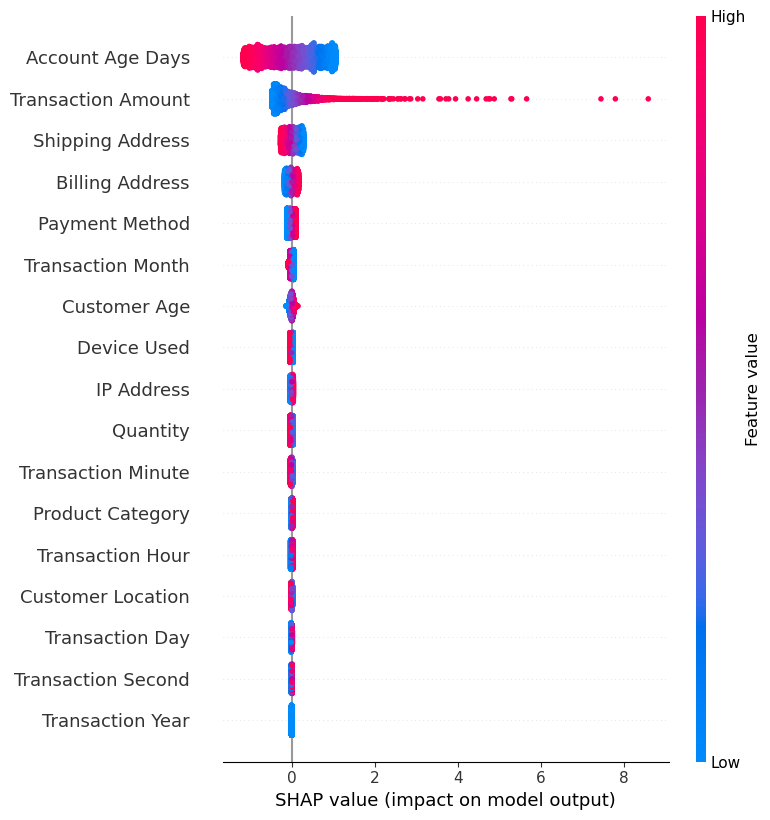

In [123]:
import shap

# Initialize SHAP explainer
explainer = shap.LinearExplainer(best_model, X_train_scaled)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

Accuracy after resampling: 0.7036175163951767


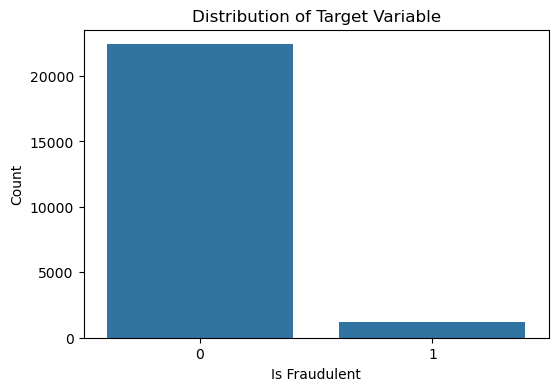

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Is Fraudulent', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

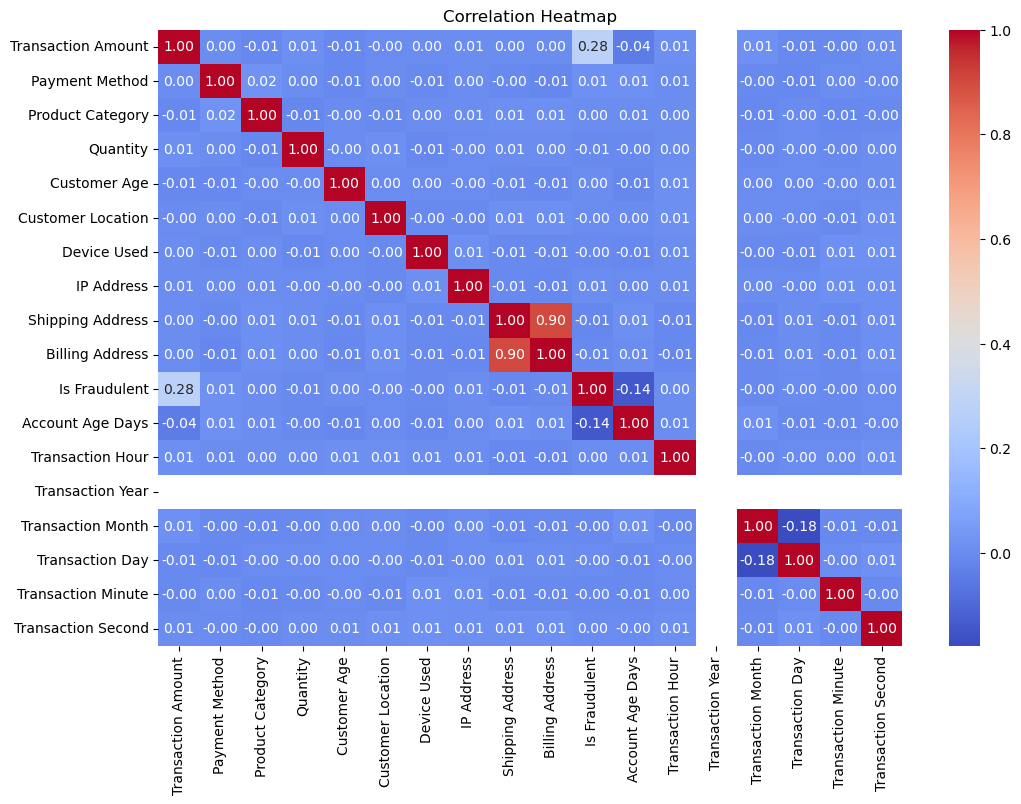

In [142]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

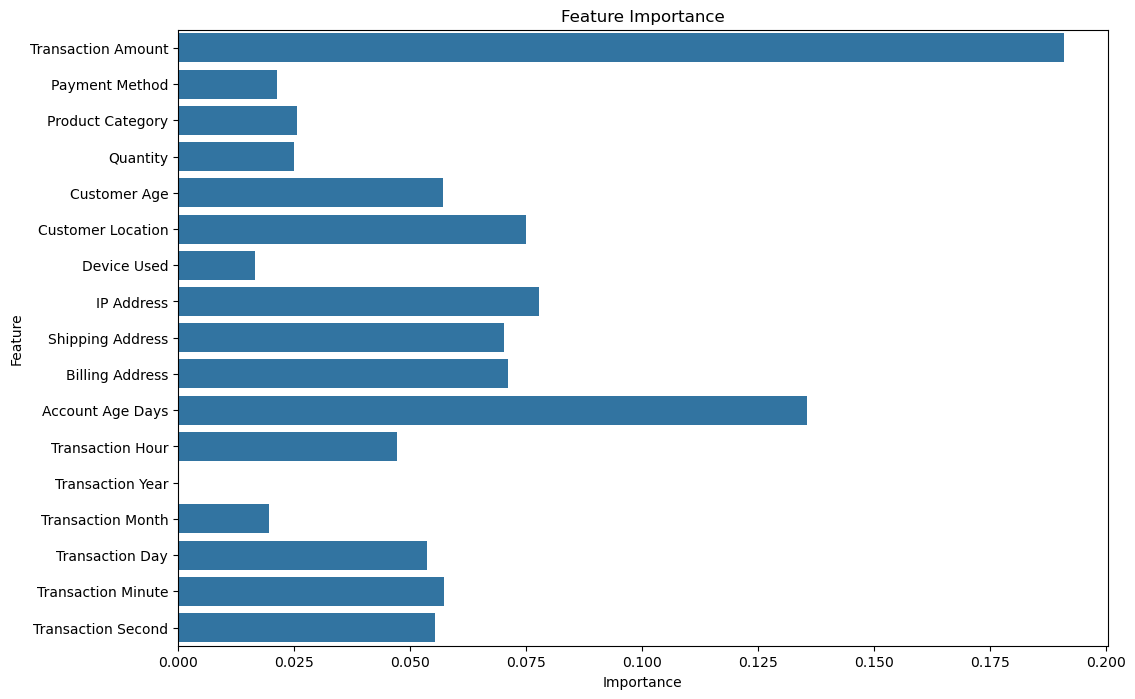

In [127]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Get feature importance
feature_importance = rf_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

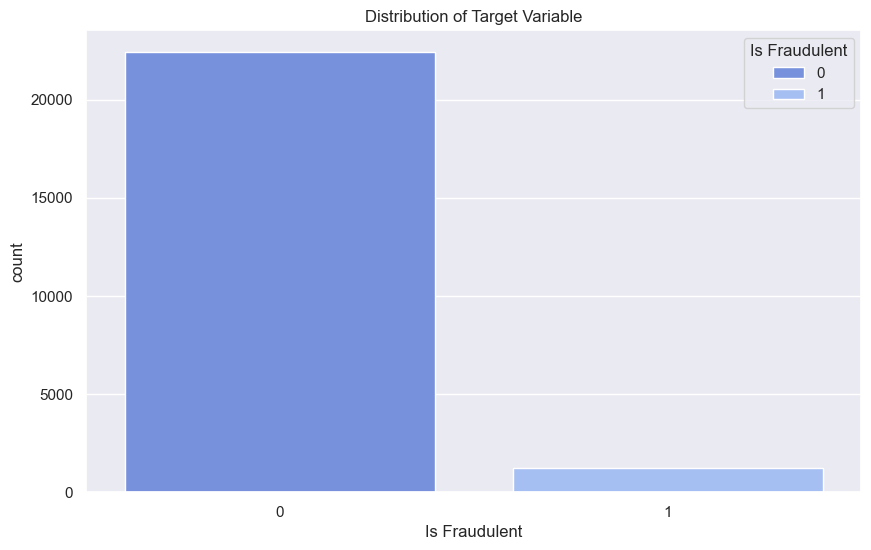

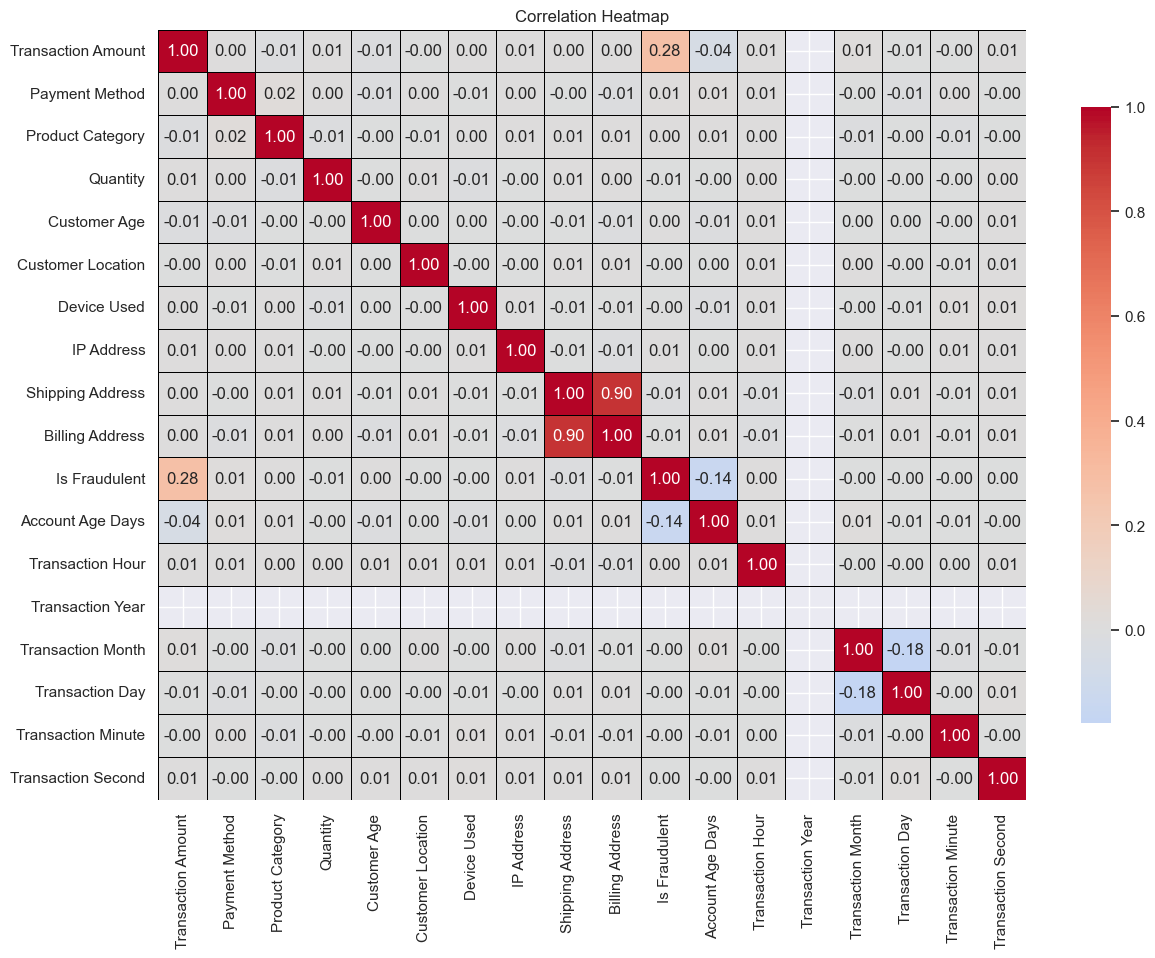

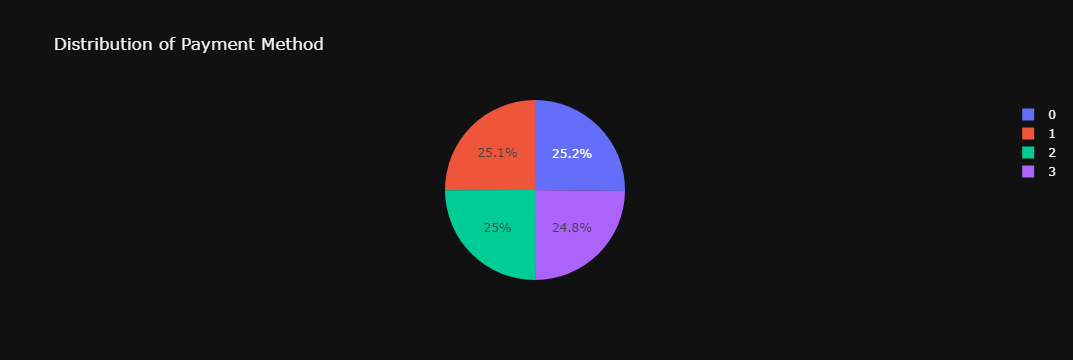

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set dark theme for seaborn
sns.set_theme(style="darkgrid", palette="coolwarm")

# Example: Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Is Fraudulent', data=df, hue='Is Fraudulent', dodge=False)
plt.title('Distribution of Target Variable')
plt.show()

# Set dark theme for seaborn
sns.set_theme(style="darkgrid")

# Example: Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=.5, linecolor='black', cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap')
plt.show()

# Example: Payment Method Pie Chart using Plotly
payment_method_counts = df['Payment Method'].value_counts()
fig = px.pie(payment_method_counts, values=payment_method_counts.values, names=payment_method_counts.index, title='Distribution of Payment Method')
fig.update_layout(template='plotly_dark')
fig.show()